<a href="https://colab.research.google.com/github/sipocz/_earthQuake/blob/main/EarthQuaqe_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#EarthQuake
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import sweetviz as sw

!pip install sweetviz
import sweetviz as sw


Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/My Drive/001_AI/_EarthQuake/features_a.csv")
df_clasters=pd.read_csv("/content/drive/My Drive/001_AI/_EarthQuake/train_labels.csv")

In [4]:
Y=df_clasters[["damage_grade"]]
X=df

In [5]:
len(X.columns)


X=X[:1000]
Y=Y[:1000]

In [6]:
from sklearn.linear_model import Lasso
alpha=0.000001
lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e6)
lassoreg.fit(X,Y)
lassopred = lassoreg.predict(X)


In [7]:
df.columns

Index(['Unnamed: 0', 'geo_level_1_id', 'geo_level_2_id', 'count_floors_pre_eq',
       'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_other',
       'land_surface_condition_t', 'land_surface_condition_o',
       'foundation_type_h', 'foundation_type_w', 'foundation_type_i',
       'foundation_typ

In [8]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
X
# Separating out the target
Y
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['p1', 'p2', 'p3'])

In [10]:
principalDf.head()

,p1,p2,p3
0,-1.113688,1.692604,-0.215551
1,-0.735408,0.350682,-1.212528
2,-0.688138,0.276414,-0.310029
3,-1.193480,-1.353404,1.066664
4,-0.202704,1.406066,1.006346


In [11]:
Y[["damage_grade"]]

,damage_grade
0,3
1,2
2,3
3,2
4,3
...,...
9995,2
9996,2
9997,3
9998,2


In [12]:
Y

,damage_grade
0,3
1,2
2,3
3,2
4,3
...,...
9995,2
9996,2
9997,3
9998,2


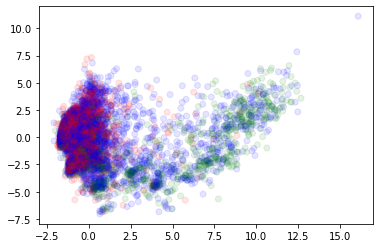

In [13]:
color=["","green","blue","red"]
colorl=[color[i] for i in list(Y["damage_grade"])]
plt.scatter(principalDf[["p1"]],principalDf[["p2"]], c=colorl, alpha=0.1)

In [14]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.cluster import MeanShift
import sklearn.cluster as cluster


from sklearn.decomposition import PCA

In [15]:
n_cluster_num=3
df_feature=X
clusterer = KMeans(n_clusters=n_cluster_num, random_state=10)
cluster_labels_Kmeans = clusterer.fit_predict(df_feature)



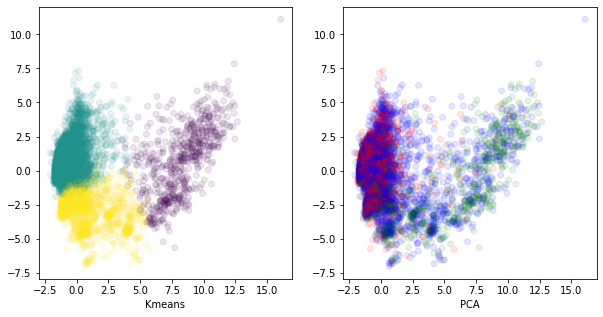

In [16]:
# Kezdjünk új ábrát (plt.figure)!
plt.figure(figsize=(10,5))
# Rajzoljunk a plt.scatter segítségével!
# Segítség: X_pca[:, 0], X_pca[:, 1], c=Y
plt.subplot(121)
plt.xlabel("Kmeans")
plt.scatter(principalDf[["p1"]],principalDf[["p2"]],c=cluster_labels_Kmeans,alpha=0.1)
plt.subplot(122)
plt.xlabel("PCA")
plt.scatter(principalDf[["p1"]],principalDf[["p2"]], c=colorl, alpha=0.1)

# Állítsuk be a tengelyek címkéit és a címet!

plt.show()

In [17]:
cluster_labels_Kmeans=[]

In [18]:
clusterer=DBSCAN(eps=0.395)
cluster_label_DBScan=clusterer.fit_predict(df_feature)
print(set(cluster_label_DBScan))


{0, 1, 2, -1}


In [19]:
color=["","green","blue","red"]
colorpca=[color[i] for i in list(Y["damage_grade"])]

color2=["red","green","blue","red"]

colordbs=[color2[i] for i in list(cluster_label_DBScan)]


In [20]:
def calculacio(db):
    db=list(db)
    _a0=db.count(0)
    _a1=db.count(1)
    _a2=db.count(2)
    _a3=db.count(3)
    print(f"0:{_a0:4} \\ 1:{_a1:4} \\ 2:{_a2:4} \\ 3:{_a3:4}")
    

In [27]:
#eps=0.392 szemre nagyon jó eredményt produkál NEm lehet ilyen!!

# 0,3919 -- 0.3900 
a=np.linspace(0.8,3.9,10) 
for epsx in a:
    clusterer=DBSCAN(eps=epsx)
    cluster_label_DBScan=clusterer.fit_predict(df_feature)
    print (epsx,end="-->")
    print(set(cluster_label_DBScan))
    calculacio(cluster_label_DBScan)
    #calculacio(Y["damage_grade"])



0.8-->{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, -1}
0: 903 \ 1: 118 \ 2:  36 \ 3:   7
1.1444444444444444-->{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, -1}
0:  55 \ 1: 164 \ 2:1019 \ 3:   5
1.488888888888889-->{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 

In [97]:
colorpca[0:20]

['red',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'green',
 'blue',
 'green',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'blue',
 'red']

In [ ]:
color=["","green","blue","red"]
colorpca=[color[i] for i in list(Y["damage_grade"])]

color2=["red","green","blue","red"]

colordbs=[color2[i] for i in list(cluster_label_DBScan)]
calculacio(cluster_label_DBScan)
calculacio(Y["damage_grade"])


# Kezdjünk új ábrát (plt.figure)!
plt.figure(figsize=(30,15))
# Rajzoljunk a plt.scatter segítségével!
# Segítség: X_pca[:, 0], X_pca[:, 1], c=Y
plt.subplot(121)
plt.xlabel("DBScan")

plt.scatter(principalDf[["p1"]],principalDf[["p2"]],c=colordbs,alpha=0.9)
plt.subplot(122)
plt.xlabel("PCA")
plt.scatter(principalDf[["p1"]],principalDf[["p2"]], c=colorpca, alpha=0.9)

# Állítsuk be a tengelyek címkéit és a címet!

plt.show()

Több clusterre kellene osztani. Vizsgálni kellene melyik kluszter melyik 